In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

## Histograms & KDE plots

In [29]:
given_df = pd.read_csv("given_dataset.csv", sep=";")
new_df = pd.read_csv("new_dataset.csv", sep=";")

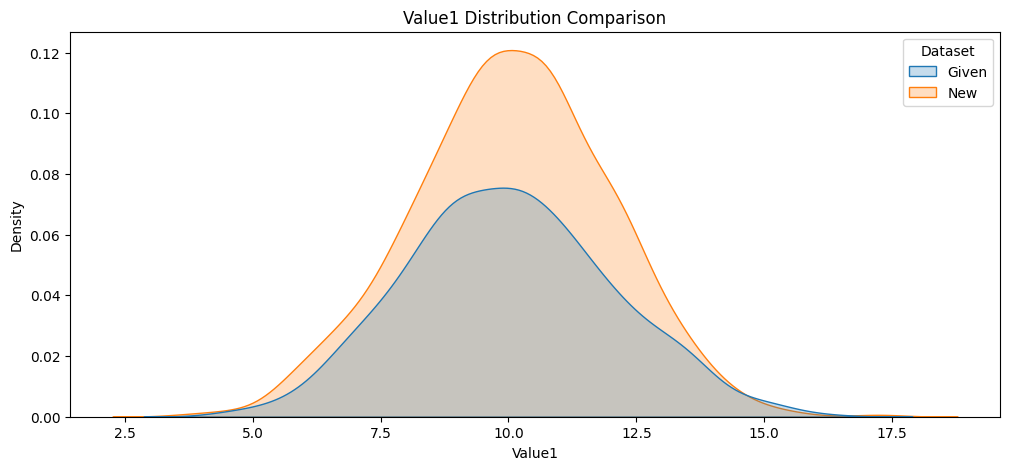

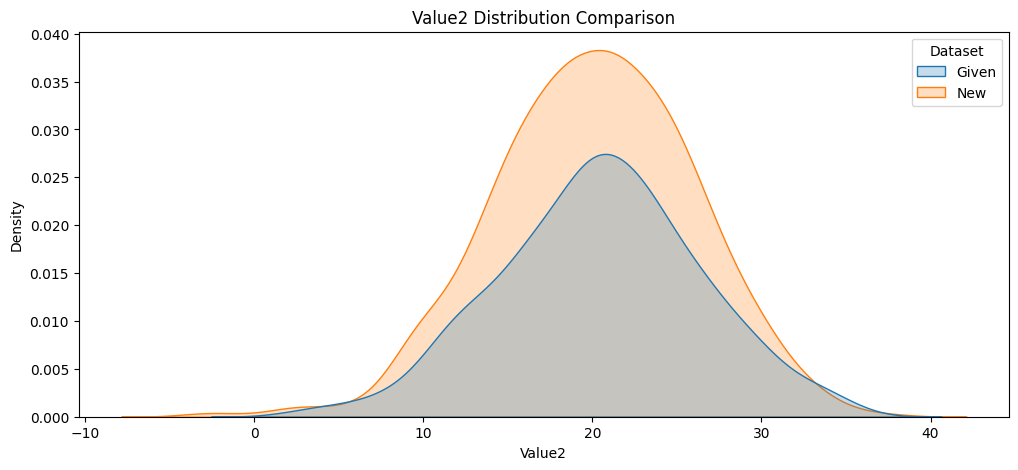

In [30]:
# Combine for plotting
given_df["Dataset"] = "Given"
new_df["Dataset"] = "New"
combined = pd.concat([given_df, new_df])

# KDE plots
plt.figure(figsize=(12, 5))
sns.kdeplot(data=combined, x="Value1", hue="Dataset", fill=True)
plt.title("Value1 Distribution Comparison")
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(data=combined, x="Value2", hue="Dataset", fill=True)
plt.title("Value2 Distribution Comparison")
plt.show()


## Category distribution comparison

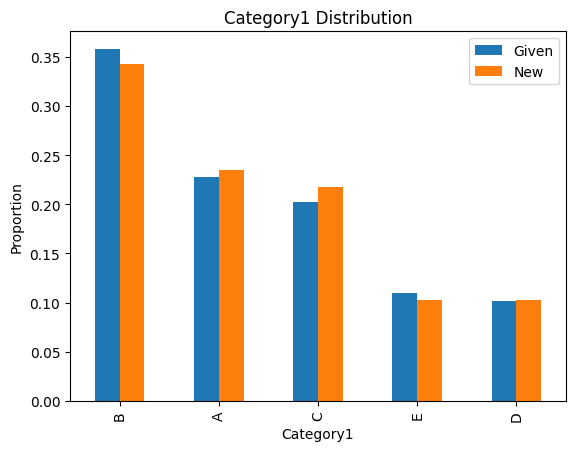

In [31]:
pd.concat([
    given_df["Category1"].value_counts(normalize=True).rename("Given"),
    new_df["Category1"].value_counts(normalize=True).rename("New")
], axis=1).plot(kind="bar", title="Category1 Distribution")
plt.ylabel("Proportion")
plt.show()


## Statistical test: Kolmogorov–Smirnov

In [32]:
ks_val1 = stats.ks_2samp(given_df["Value1"], new_df["Value1"])
ks_val2 = stats.ks_2samp(given_df["Value2"], new_df["Value2"])
print(f"KS test Value1: {ks_val1}")
print(f"KS test Value2: {ks_val2}")

KS test Value1: KstestResult(statistic=np.float64(0.058), pvalue=np.float64(0.2581688026747664), statistic_location=np.float64(9.274322879120682), statistic_sign=np.int8(1))
KS test Value2: KstestResult(statistic=np.float64(0.05266666666666667), pvalue=np.float64(0.3673043999287238), statistic_location=np.float64(19.393384184000475), statistic_sign=np.int8(-1))
